In [1]:
## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import nltk


In [3]:
## Data Cleaning

In [4]:
df=pd.read_csv("Amazon Product Reviews.csv")
df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,sentiment
0,US,11555559,R1QXC7AHHJBQ3O,B00IKPX4GY,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Five Stars,Great love it,2015-08-31,1
1,US,31469372,R175VSRV6ZETOP,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,3,0,0,N,N,Lots of ads Slow processing speed Occasionally...,Lots of ads<br />Slow processing speed<br />Oc...,2015-08-31,0
2,US,26843895,R2HRFF78MWGY19,B00IKPW0UA,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Well thought out device,Excellent unit. The versatility of this table...,2015-08-31,1
3,US,19844868,R8Q39WPKYVSTX,B00LCHSHMS,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,4,0,0,N,N,Not all apps/games we were looking forward to ...,I bought this on Amazon Prime so I ended up bu...,2015-08-31,1
4,US,1189852,R3RL4C8YP2ZCJL,B00IKPZ5V6,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Five Stars,All Amazon products continue to meet my expect...,2015-08-31,1


In [5]:
# # Add a new column 'Id' with unique identifiers at the first position
# df.insert(0, 'Id', range(1, len(df) + 1))

# df.head()

In [6]:
df=df[['star_rating', 'review_body', 'sentiment']]

df.head()

,star_rating,review_body,sentiment
0,5,Great love it,1
1,3,Lots of ads<br />Slow processing speed<br />Oc...,0
2,5,Excellent unit. The versatility of this table...,1
3,4,I bought this on Amazon Prime so I ended up bu...,1
4,5,All Amazon products continue to meet my expect...,1


In [7]:
## EDA

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30846 entries, 0 to 30845
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   star_rating  30846 non-null  int64 
 1   review_body  30842 non-null  object
 2   sentiment    30846 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 723.1+ KB


In [9]:
df.isnull().sum()

star_rating    0
review_body    4
sentiment      0
dtype: int64

In [10]:
df[df["review_body"].isna()==True]

,star_rating,review_body,sentiment
671,4,NaN,1
10535,2,NaN,0
10682,5,NaN,1
25268,5,NaN,1


In [11]:
df.dropna(inplace=True)

In [12]:
df['star_rating'].value_counts()

star_rating
5    20017
4     5747
3     2216
1     1708
2     1154
Name: count, dtype: int64

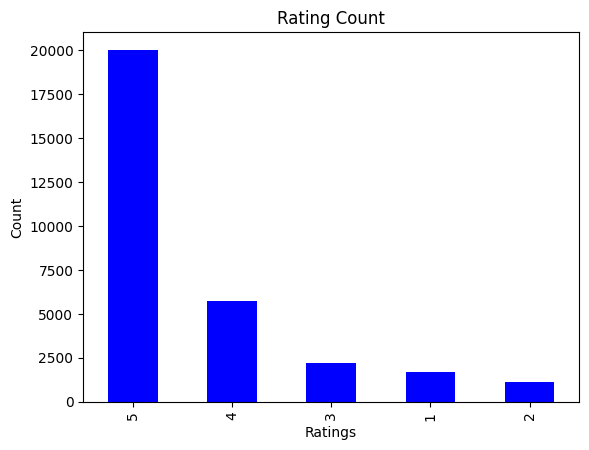

In [13]:
import matplotlib.pyplot as plt
df['star_rating'].value_counts().plot.bar(color='blue')
plt.title('Rating Count')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

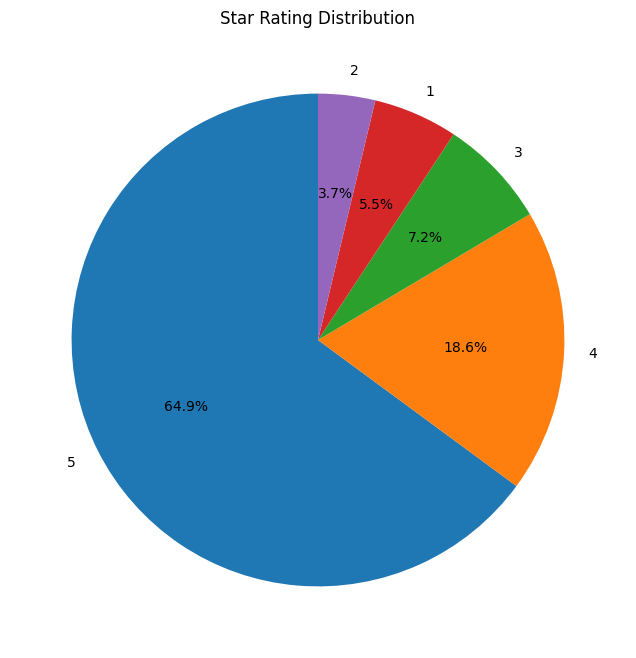

In [14]:
# Calculate the percentage distribution of star ratings
y = round(df['star_rating'].value_counts() / df.shape[0] * 100, 2)

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(y, labels=y.index, autopct='%1.1f%%', startangle=90)
plt.title('Star Rating Distribution')
plt.show()

In [15]:
y.index

Index([5, 4, 3, 1, 2], dtype='int64', name='star_rating')

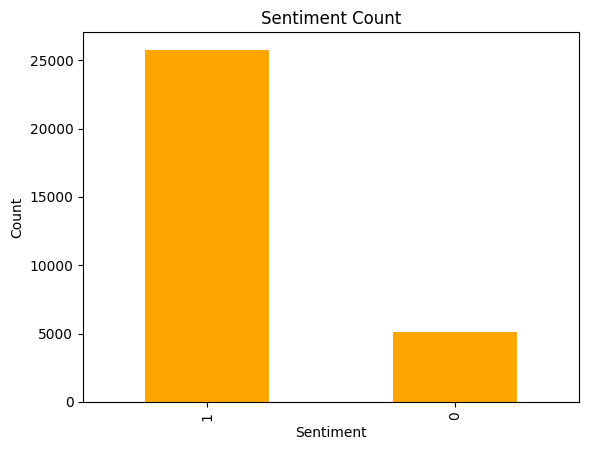

In [16]:
df['sentiment'].value_counts().plot.bar(color='orange')
plt.title('Sentiment Count')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [17]:
# first record of positive sentiment
df[df['sentiment']==1].iloc[0]['review_body']

'Great love it'

In [18]:
df[df['sentiment']==0].iloc[0]['review_body']

'Lots of ads<br />Slow processing speed<br />Occasionally shuts down apps<br />WIFI keeps having authentication issues<br /><br />Was cheap for a tablet and now i know why.'

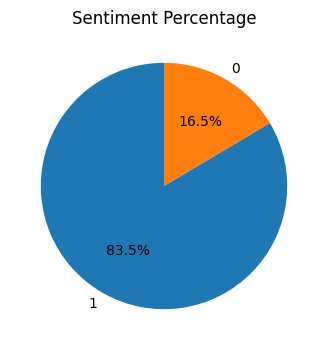

In [19]:
# Calculate the percentage distribution of star ratings
y = round(df['sentiment'].value_counts() / df.shape[0] * 100, 2)

# Plot the pie chart
plt.figure(figsize=(6, 4))
plt.pie(y, labels=y.index, autopct='%1.1f%%', startangle=90)
plt.title('Sentiment Percentage')
plt.show()

In [20]:
df[df['sentiment']==1]['star_rating'].value_counts()

star_rating
5    20017
4     5747
Name: count, dtype: int64

In [21]:
df[df['sentiment']==0]['star_rating'].value_counts()


star_rating
3    2216
1    1708
2    1154
Name: count, dtype: int64

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

In [23]:
cv=CountVectorizer(stop_words='english')
words=cv.fit_transform(df.review_body)

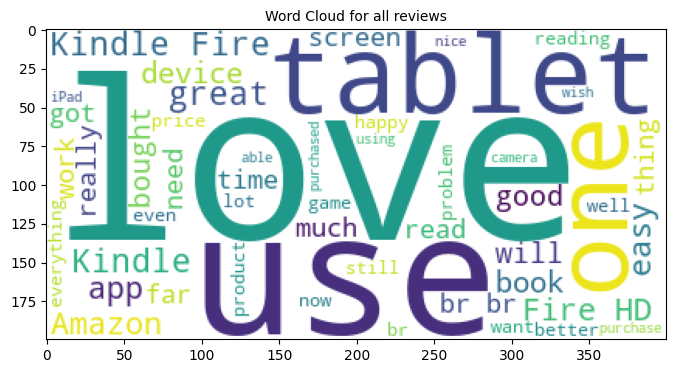

In [24]:
reviews=" ".join([review for review in df['review_body']])

wc=WordCloud(background_color='white', max_words=50)

plt.figure(figsize=(8,8))
plt.imshow(wc.generate(reviews))
plt.title('Word Cloud for all reviews', fontsize=10)
plt.axis=('off')
plt.show()

In [25]:
# Combine all reviews for each feedback category and splitting them into individual words
neg_reviews = " ".join([review for review in df[df['sentiment'] == 0]['review_body']])
neg_reviews = neg_reviews.lower().split()

pos_reviews = " ".join([review for review in df[df['sentiment'] == 1]['review_body']])
pos_reviews = pos_reviews.lower().split()

#Finding words from reviews which are present in that feedback category only
unique_negative = [x for x in neg_reviews if x not in pos_reviews]
unique_negative = " ".join(unique_negative)

unique_positive = [x for x in pos_reviews if x not in neg_reviews]
unique_positive = " ".join(unique_positive)

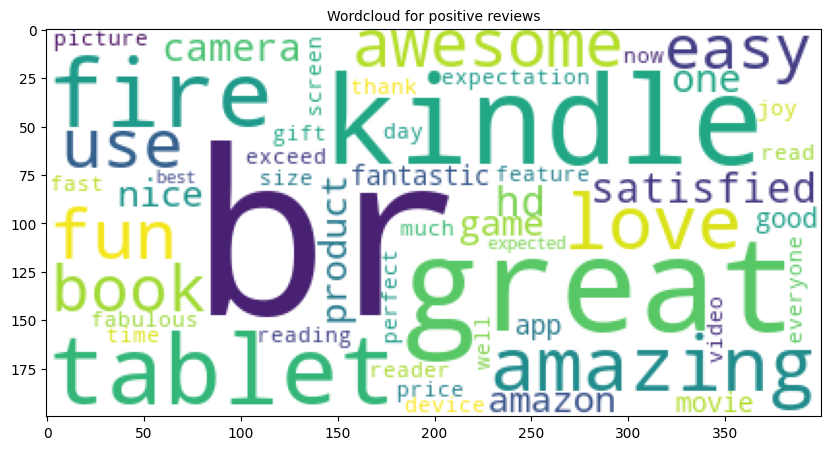

In [26]:
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_positive))
plt.title('Wordcloud for positive reviews', fontsize=10)
plt.show()

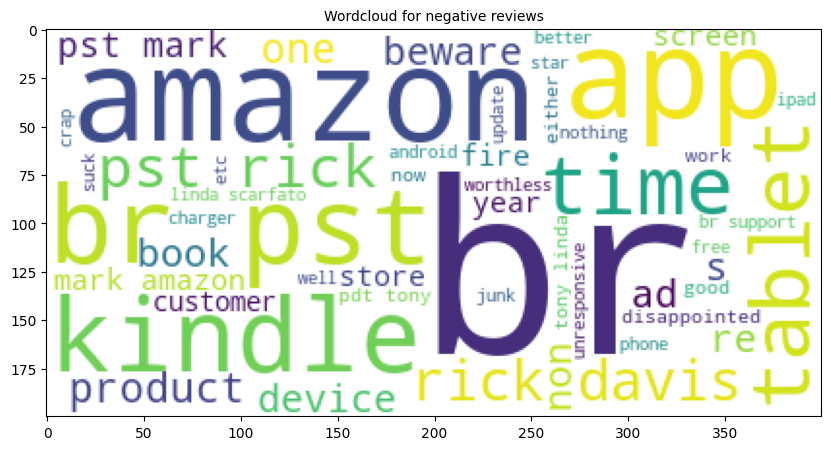

In [27]:
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_negative))
plt.title('Wordcloud for negative reviews', fontsize=10)
plt.show()

## Preprocessing

In [28]:

from nltk.stem import PorterStemmer
import re
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

corpus = []
stemmer = PorterStemmer()
for i in range(0, df.shape[0]):
  review = re.sub('[^a-zA-Z]', ' ', df.iloc[i]['review_body'])
  review = review.lower().split()
  review = [stemmer.stem(word) for word in review if not word in STOPWORDS]
  review = ' '.join(review)
  corpus.append(review)

In [29]:
cv = CountVectorizer(max_features = 2500)

# Storing independent and dependent variables in X and y
X = cv.fit_transform(corpus).toarray()
y = df['sentiment'].values

In [30]:
import pickle
# Saving the Count Vectorizer
pickle.dump(cv, open('countVectorizer.pkl', 'wb'))

In [31]:
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (30842, 2500)
y shape: (30842,)


In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 15)

print(f"X train: {X_train.shape}")
print(f"y train: {y_train.shape}")
print(f"X test: {X_test.shape}")
print(f"y test: {y_test.shape}")

X train: (21589, 2500)
y train: (21589,)
X test: (9253, 2500)
y test: (9253,)


In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)

In [34]:
pickle.dump(scaler, open('scaler.pkl', 'wb'))


## Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier
# Fitting scaled X_train and y_train on Random Forest Classifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train_scl, y_train)

RandomForestClassifier()

In [36]:
# Accuracy of the model on training and testing data
 
print("Training Accuracy :", model_rf.score(X_train_scl, y_train))
print("Testing Accuracy :", model_rf.score(X_test_scl, y_test))

Training Accuracy : 0.996479688730372
Testing Accuracy : 0.8910623581541122


In [37]:
# Predicting on the test set
y_preds = model_rf.predict(X_test_scl)

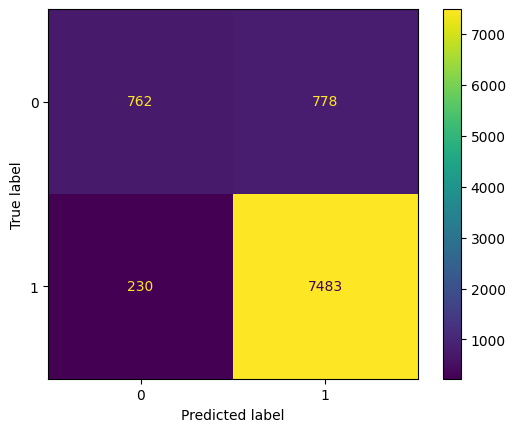

In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_preds)

cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_rf.classes_)
cm_display.plot()
plt.show()

## Decision Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train_scl, y_train)

DecisionTreeClassifier()

In [40]:
#Accuracy of the model on training and testing data
 
print("Training Accuracy :", model_dt.score(X_train_scl, y_train))
print("Testing Accuracy :", model_dt.score(X_test_scl, y_test))

Training Accuracy : 0.9965260086154987
Testing Accuracy : 0.8379984869771966


In [41]:
# Predicting on the test set
y_preds = model_dt.predict(X_test_scl)

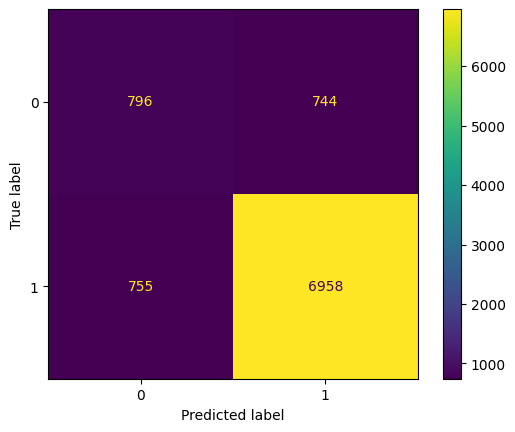

In [42]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_preds)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_dt.classes_)
cm_display.plot()
plt.show()

## XGBoost

In [43]:
from xgboost import XGBClassifier
model_xgb = XGBClassifier()
model_xgb.fit(X_train_scl, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [44]:
#Accuracy of the model on training and testing data
 
print("Training Accuracy :", model_xgb.score(X_train_scl, y_train))
print("Testing Accuracy :", model_xgb.score(X_test_scl, y_test))

Training Accuracy : 0.9365417573764417
Testing Accuracy : 0.8927915270723009


In [45]:
y_preds = model_dt.predict(X_test)

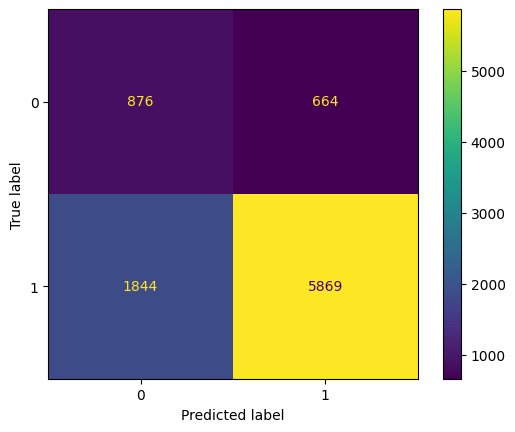

In [46]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_preds)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_xgb.classes_)
cm_display.plot()
plt.show()

In [47]:
# Random forest and decision trees are overfitting, taking xgboost.


pickle.dump(model_xgb, open('model_xgb.pkl', 'wb'))